# Trabalho final ML

<a href="https://www.kaggle.com/code/reihanenamdari/depression-logistic-regression-and-gridsearchcv/data">Dataset</a>
<br>
<hr>

<br>

#### Contexto e objetivo do trabalho
O trabalho prático da disciplina CMP263 - Aprendizagem de Máquina visa
permitir que os alunos desenvolvam um modelo preditivo para um problema de
interesse, praticando aspectos discutidos na disciplina relacionados ao treinamento e
avaliação de modelos de classificação ou regressão, e interpretação dos modelos
gerados.
A proposta do projeto final é que os alunos aprofundem e consolidem sua
experiência no desenvolvimento de modelos preditivos, abordando aspectos ao
longo de toda a metodologia de treinamento de modelos, conforme discutimos em
aula. 

## Metodologia

CRISP-DM

1. Entendimento do negócio
2. Entendimento dos dados
3. Preparação dos dados
4. Modelagem
5. Validação
6. Deployment

## 1. Entendimento do negócio

### About Dataset
##### Context


O dataset original foi publicado pro Frankcc no seguinte link: <a href="https://www.kaggle.com/datasets/diegobabativa/depression?resource=download">Link Kaggle</a>

O dataset está envolvido na análise da depressão. Os dados consistem de um estudo das condições de vida de pessoas que vivem em zonas rurais. 

- Conteúdo
1. Surveyid 
2. Villeid
3. sex
4. Age
5. Married
6. Numberchildren 
7. educationlevel
8. totalmembers (in the family) 
9. gainedasset
10. durableasset 
11. saveasset
12. livingexpenses 
13. otherexpenses
14. incomingsalary 
15. incomingownfarm 
16. incomingbusiness
17. incomingnobusiness
18. incomingagricultural 
19. farmexpenses
20. laborprimary 
21. lastinginvestment
22. nolastinginvestmen
23. depressed: [ Zero: No depressed] or [One: depressed] (Binary for target class)

the main objective is to show statistic analysis and some data mining techniques.

The dataset has 23 columns or dimensions and a total of 1432 rows or objects.

Acknowledgements
The original attribution is to Frankcc i

Inspiration

<a href="https://zindi.africa/competitions/busara-mental-health-prediction-challenge/data">Busara</a>

## Problema

Classificação -  objetivo é treinar o melhor classificador possível para detectar o risco de depressão



Tirando esta parte, você precisa avaliar as necessidades de pré-processamento dos dados, como imputar valor faltantes, tratar outliers, normalizar, balancear as classes, etc... Você pode aplicar seleção de atributos se deseja avaliar se um subconjunto dos atributos originais já lhe dar bom poder preditivo.

Esse pipeline será integrado a algoritmos de classificação (veja bem, suas saídas são numéricas, mas não se trata de uma regressão. Você tem valores na classe 0 ou 1, pois as classes foram codificadas dessa forma) - e o objetivo será treinar o melhor classificador possível para detectar o risco de depressão.

 

In [13]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## i) análise exploratória dos dados
para identificar possíveis problemas nos
dados que possam impactar negativamente no treinamento de modelos;

In [ ]:
for dirname, _, filenames in os.walk('/home/kaline/workspace/mestrado/TrabalhoFinalML/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
target_column_name = 'depressed'

In [23]:
def DataLoading():
    df = pd.read_csv('b_depressed.csv')
    print('Dataset - Linhasxcolunas ', df.shape)
    

    return df

df = DataLoading()
df

Dataset - Linhasxcolunas  (1429, 23)


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9989e2b850>,
      dtype=object)

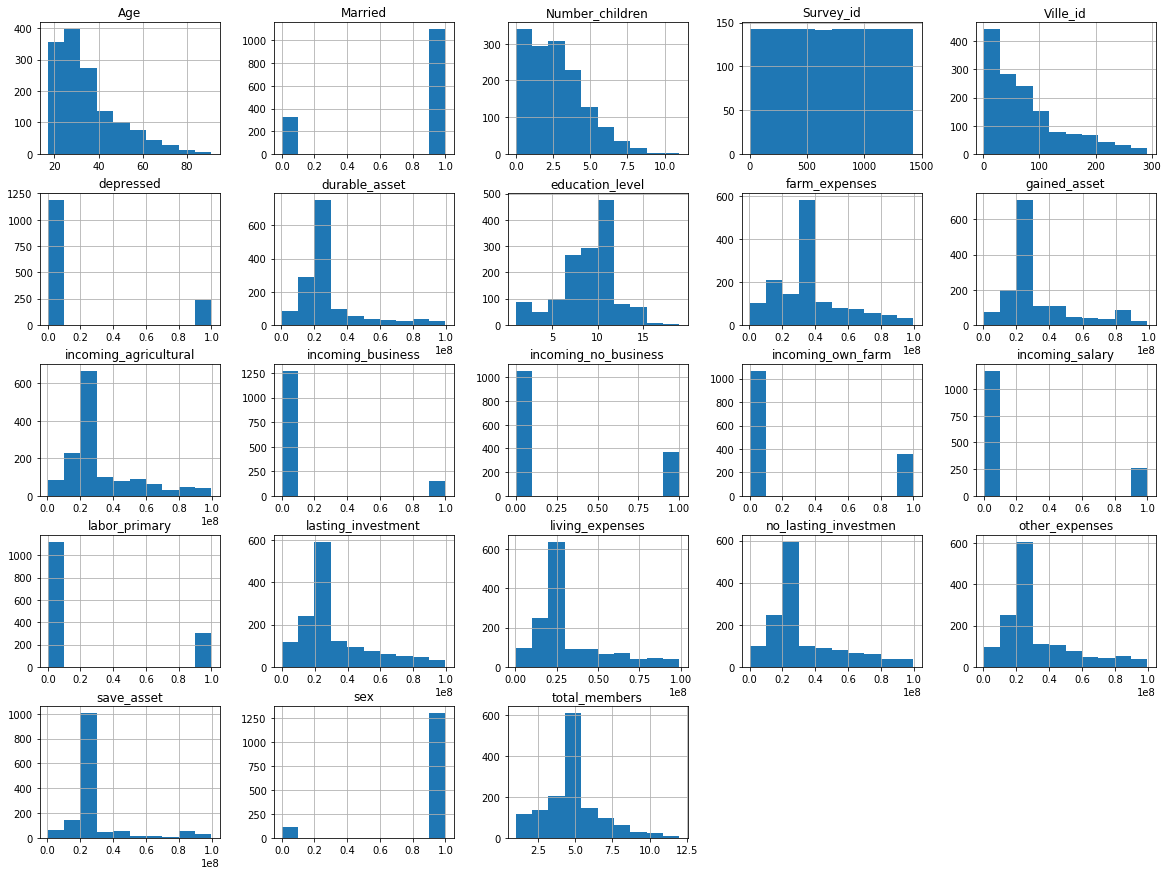

In [26]:
df.hist(figsize=(20, 15))

0    1191
1     238
Name: depressed, dtype: int64
depressed
0    83.344997
1    16.655003
dtype: float64


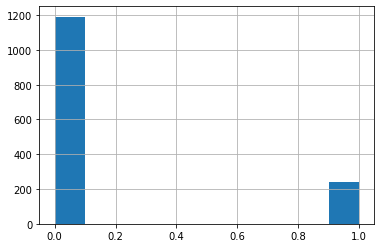

In [66]:
print(df['depressed'].value_counts())
print(df.groupby('depressed').size()/df.shape[0]
*100)

df['depressed'].hist()

### Distribuição da coluna target (depressed)

Classes não balanceadas


A variável target do treino possui 19.98% de positivos.


Text(0.5, 1.0, 'Quantidade de registros por classe')

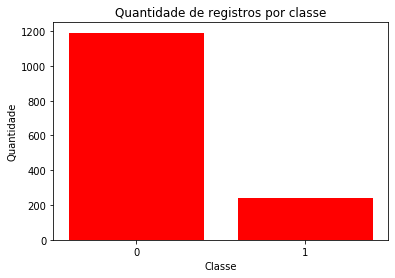

In [37]:
#Contagem de registros por classes
from turtle import color


target_counts = df['depressed'].value_counts()
positives = target_counts[1]
negatives = target_counts[0]

#Proporção em %
prop = (positives/negatives)*100
print('\nA variável target do treino possui {}% de positivos.'. format(round(prop,2)))

#Gráfico
plt.bar(target_counts.index, target_counts,color='red')
plt.xticks([0, 1])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Quantidade de registros por classe')


#### Tipos de dados nas colunas

Text(0.5, 1.0, 'Quantidade de colunas por tipos de dados')

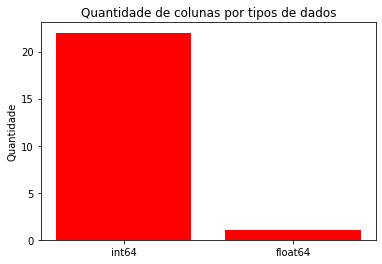

In [38]:
tipos_dados = df.dtypes.value_counts()

#Recurso visual
plt.bar(tipos_dados.index.astype(str), tipos_dados.values, color='red')
plt.ylabel('Quantidade')
plt.title('Quantidade de colunas por tipos de dados')

In [11]:
df.info

<bound method DataFrame.info of       Survey_id  Ville_id  sex  Age  Married  Number_children  \
0           926        91    1   28        1                4   
1           747        57    1   23        1                3   
2          1190       115    1   22        1                3   
3          1065        97    1   27        1                2   
4           806        42    0   59        0                4   
...         ...       ...  ...  ...      ...              ...   
1424        255        22    1   25        1                1   
1425        547        69    1   28        1                4   
1426        893       184    1   66        0                0   
1427        363        75    1   51        1                1   
1428        231        12    1   33        0                4   

      education_level  total_members  gained_asset  durable_asset  ...  \
0                  10              5      28912201       22861940  ...   
1                   8              5   

In [ ]:
df.shape

(1429, 23)

In [ ]:
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
df.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [ ]:
min(df['Age'])

17

In [ ]:
max(df['Age'])

91

In [ ]:
df.mean()

Survey_id                7.150000e+02
Ville_id                 7.628621e+01
sex                      9.181246e-01
Age                      3.477747e+01
Married                  7.725682e-01
Number_children          2.883135e+00
education_level          8.687194e+00
total_members            4.969209e+00
gained_asset             3.363448e+07
durable_asset            2.717296e+07
save_asset               2.742471e+07
living_expenses          3.248257e+07
other_expenses           3.366632e+07
incoming_salary          1.798460e-01
incoming_own_farm        2.519244e-01
incoming_business        1.077677e-01
incoming_no_business     2.603219e-01
incoming_agricultural    3.451039e+07
farm_expenses            3.549153e+07
labor_primary            2.134360e-01
lasting_investment       3.299222e+07
no_lasting_investmen     3.360385e+07
depressed                1.665500e-01
dtype: float64

In [46]:
print('Podemos observar que temos variáveis em diferentes escalas\nO desvio padrão (std) alto')
df.describe()

Podemos observar que temos variáveis em diferentes escalas
O desvio padrão (std) alto


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [16]:
df.corr()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
Survey_id,1.000000,0.662523,0.025015,0.021877,-0.011441,0.020242,-0.037984,0.003653,0.018949,-0.020738,...,0.021197,0.004713,-0.032408,-0.036382,0.039071,0.063214,-0.011613,0.001956,-0.003457,-0.005960
Ville_id,0.662523,1.000000,0.010970,-0.012279,0.026970,0.030428,-0.010412,0.007225,-0.014400,-0.026135,...,-0.017517,-0.101155,-0.012744,-0.017370,0.018342,0.058739,-0.030992,-0.039209,0.004416,0.028954
sex,0.025015,0.010970,1.000000,-0.159376,0.282472,0.214297,-0.072137,0.180664,0.022316,0.028602,...,-0.032950,0.067467,0.087322,0.101543,0.017828,0.070757,-0.025092,0.037923,0.048166,-0.003519
Age,0.021877,-0.012279,-0.159376,1.000000,-0.396944,-0.138448,-0.377146,-0.073936,0.008316,0.045368,...,-0.055884,0.125569,-0.028204,-0.087054,-0.009173,-0.009428,-0.066347,0.045714,-0.023430,0.105721
Married,-0.011441,0.026970,0.282472,-0.396944,1.000000,0.227206,0.218406,0.246808,-0.015317,-0.045356,...,0.023690,0.007212,-0.032171,0.044150,-0.043032,0.036919,0.017792,-0.000606,0.050146,-0.062155
Number_children,0.020242,0.030428,0.214297,-0.138448,0.227206,1.000000,0.175165,0.781731,0.016195,-0.014358,...,-0.019415,0.061140,0.032514,0.065935,0.018512,0.052273,-0.016731,0.042988,0.014344,0.003823
education_level,-0.037984,-0.010412,-0.072137,-0.377146,0.218406,0.175165,1.000000,0.130236,0.014534,-0.011658,...,0.010843,-0.033861,0.014032,0.037305,-0.054515,0.010648,0.044067,0.005361,0.013849,-0.098043
total_members,0.003653,0.007225,0.180664,-0.073936,0.246808,0.781731,0.130236,1.000000,0.015472,-0.040372,...,-0.047026,0.093959,0.008520,0.070958,0.026157,0.072907,-0.043622,0.044341,0.048028,0.035056
gained_asset,0.018949,-0.014400,0.022316,0.008316,-0.015317,0.016195,0.014534,0.015472,1.000000,-0.005730,...,0.028493,0.126403,0.050641,0.075120,0.028656,0.058569,0.022879,0.033085,0.030779,-0.004402
durable_asset,-0.020738,-0.026135,0.028602,0.045368,-0.045356,-0.014358,-0.011658,-0.040372,-0.005730,1.000000,...,0.078162,0.064366,0.015376,0.020218,0.024395,0.027892,0.094494,0.246894,0.022460,0.040505


### Count NAN in each column

In [47]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

## Detecção de outliers

Melhorar a perfomance do R² (score)

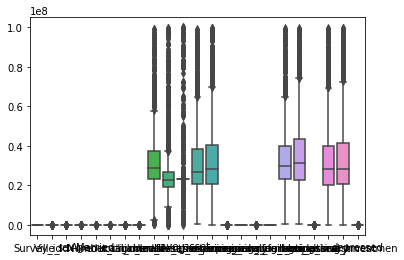

In [ ]:
sns.boxplot(data=df)

In [ ]:
df.count()

Survey_id                1429
Ville_id                 1429
sex                      1429
Age                      1429
Married                  1429
Number_children          1429
education_level          1429
total_members            1429
gained_asset             1429
durable_asset            1429
save_asset               1429
living_expenses          1429
other_expenses           1429
incoming_salary          1429
incoming_own_farm        1429
incoming_business        1429
incoming_no_business     1429
incoming_agricultural    1429
farm_expenses            1429
labor_primary            1429
lasting_investment       1429
no_lasting_investmen     1409
depressed                1429
dtype: int64

<AxesSubplot:xlabel='no_lasting_investmen'>

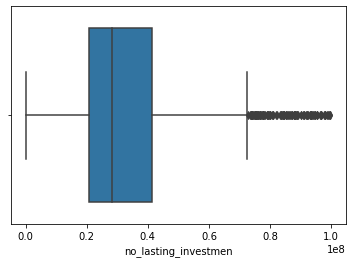

In [ ]:
sns.boxplot(x=df['no_lasting_investmen'])

<AxesSubplot:xlabel='education_level'>

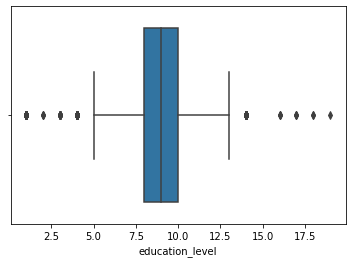

In [ ]:
sns.boxplot(x=df['education_level'])

<AxesSubplot:xlabel='lasting_investment'>

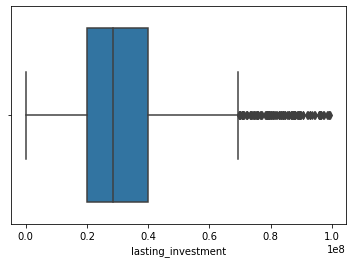

In [ ]:
sns.boxplot(x=df['lasting_investment'])

In [ ]:

# correlation 
print(df.corr())

                       Survey_id  Ville_id       sex       Age   Married  \
Survey_id               1.000000  0.662523  0.025015  0.021877 -0.011441   
Ville_id                0.662523  1.000000  0.010970 -0.012279  0.026970   
sex                     0.025015  0.010970  1.000000 -0.159376  0.282472   
Age                     0.021877 -0.012279 -0.159376  1.000000 -0.396944   
Married                -0.011441  0.026970  0.282472 -0.396944  1.000000   
Number_children         0.020242  0.030428  0.214297 -0.138448  0.227206   
education_level        -0.037984 -0.010412 -0.072137 -0.377146  0.218406   
total_members           0.003653  0.007225  0.180664 -0.073936  0.246808   
gained_asset            0.018949 -0.014400  0.022316  0.008316 -0.015317   
durable_asset          -0.020738 -0.026135  0.028602  0.045368 -0.045356   
save_asset             -0.014632 -0.020477  0.006637 -0.026685  0.009164   
living_expenses         0.012638 -0.027240 -0.003493 -0.036599  0.024518   
other_expens

## ii) pré-processamento dos dados
abordando aspectos como correção de
outliers e de valores faltantes, codificação de atributos categóricos, discretização de
atributos numéricos, normalização, ajuste de desbalanceamento de classes e
redução de dimensionalidade

### Removendo NAN

In [ ]:
df.drop(df[(df['no_lasting_investmen'].isnull())].index, axis = 0, inplace = True)
df.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

#### Valores ausentes

In [49]:
# Contagem de valores ausentes por coluna
print("Quantidade de valores ausentes por coluna: \n",np.array((len(df)-df.count())/76020))

Quantidade de valores ausentes por coluna: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00026309 0.        ]


In [50]:
# Função que deleta registros duplicados da base (Mantendo apenas o primeiro registro a cada grupo de duplicatas)
def DupRegClean(df):
    # Registros duplicados podem causar ruído nos algoritmos de machine learning portanto iremos excluí-los.
    # (Se por acaso colunas duplicadas estierem presentes nos datasets de treino e teste, os resultados podem se mostrar tendenciosos).
    print('df antes: ',df.shape)
    df_saida = df.drop_duplicates(inplace=False,keep='first')
    print('Após a limpeza de registros duplicados: ',df_saida.shape)
    return df_saida

# Aplica limpeza
df = DupRegClean(df)

df antes:  (1429, 23)
Após a limpeza de registros duplicados:  (1429, 23)


#### Colunas constantes

In [51]:
# Função que deleta colunas constantes do dataset
def ConstFeatClean(df_train):
    # Colunas constantes não são úteis para discriminar a satisfação de clientes. Vamos exclui-las.
    print('df antes: ',df_train.shape)
    df_train = df_train.loc[:,df_train.apply(pd.Series.nunique) != 1]
    print('Após limpeza de colunas constantes: ',df_train.shape)
    return df_train

# Aplica função de deleção de contantes
df = ConstFeatClean(df)

df antes:  (1429, 23)
Após limpeza de colunas constantes:  (1429, 23)


#### Removendo colunas irrelevantes

Minha sugestão no primeiro momento é remover apenas as colunas que pela sua definição não parecem ter relevância/poder preditivo, o que eu acredito ser o caso das duas variáveis com "_id" no final (não olhei em profundidade os dados). Se as variáveis forem categóricas e tiverem muitos valores possíveis, também pode ser difícil usar no modelo. Neste caso, você pode optar por manter apenas um subconjunto de valores para as categorias mais frequentes, e todas as outras agrupar em uma única categoria ("Outros", por exemplo).

In [57]:
# Colunas categoricas
print(df.select_dtypes(include=['object']).columns.tolist())

# Não tenho tempo para trabalhar com colunas de data agora
df.drop('Survey_id',inplace=True,axis=1)
df.drop('Ville_id',inplace=True,axis=1)


[]


In [58]:
df.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

#### z-score - remover outliers

## iii) treinamento e validação dos modelos,
utilizando as melhores práticas em relação a estratégias de divisão de dados para otimização de hiperparâmetros e
seleção de modelos

 - Acurácia
 - Precision
 - Recall
 - F1 Score
 - ROC AUC score

## iv) interpretação do modelo treinado, 
buscando obter insights sobre o impacto dos atributos na tomada de decisão